## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Cs"
indep_variables = ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha', 'A_year', 'F_Soil_ID', 'AEDR_mean']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean
0,0,26.060965,25.423284,49.081648,68,1,3.524231
1,0,4.303100,4.705979,8.731641,15,1,3.830667
2,0,28.142898,27.556869,54.703060,69,1,0.483571
3,0,14.953551,8.506028,40.420188,15,2,0.364500
4,0,7.208435,3.425669,2.120687,10,2,0.333333


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.705262
1,8.420682
2,5.099866
3,3.737670
4,4.290459


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4050922915504428, 0.6873558579062515, 0.7034963137215027]
    Mean: 0.599
    Std: 0.137

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.30464136 0.98241421 1.33354459]
    Mean: 1.207
    Std: 0.159

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8874637516565206, 0.9301111005690824, 0.9032272174005289]
    Mean: 0.907
    Std: 0.018

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6770642459868581                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.1863184876162866                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.1354475314452787                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 159         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9411648912889603                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6770642459868581
Gamma: 0.1863184876162866
Learning_rate: 0.1354475314452787
Max_depth: 3
N_estimators: 159
Subsample: 0.9411648912889603


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(20):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:5.13733	validation_1-rmse:5.28138
[1]	validation_0-rmse:4.55893	validation_1-rmse:4.68119
[2]	validation_0-rmse:3.99229	validation_1-rmse:4.12725
[3]	validation_0-rmse:3.55743	validation_1-rmse:3.65665
[4]	validation_0-rmse:3.19199	validation_1-rmse:3.28308
[5]	validation_0-rmse:2.88271	validation_1-rmse:2.97390
[6]	validation_0-rmse:2.62775	validation_1-rmse:2.73846


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.32444	validation_1-rmse:2.46274
[8]	validation_0-rmse:2.13793	validation_1-rmse:2.28786
[9]	validation_0-rmse:1.90631	validation_1-rmse:2.09865
[10]	validation_0-rmse:1.77361	validation_1-rmse:1.96804
[11]	validation_0-rmse:1.58730	validation_1-rmse:1.80040
[12]	validation_0-rmse:1.48949	validation_1-rmse:1.70440
[13]	validation_0-rmse:1.34808	validation_1-rmse:1.58343
[14]	validation_0-rmse:1.27973	validation_1-rmse:1.51773
[15]	validation_0-rmse:1.17542	validation_1-rmse:1.42080
[16]	validation_0-rmse:1.08544	validation_1-rmse:1.36715
[17]	validation_0-rmse:1.04429	validation_1-rmse:1.33473
[18]	validation_0-rmse:1.00454	validation_1-rmse:1.30833
[19]	validation_0-rmse:0.96727	validation_1-rmse:1.28362
[20]	validation_0-rmse:0.94082	validation_1-rmse:1.26765
[21]	validation_0-rmse:0.88258	validation_1-rmse:1.23901
[22]	validation_0-rmse:0.83368	validation_1-rmse:1.19782
[23]	validation_0-rmse:0.81686	validation_1-rmse:1.18126
[24]	validation_0-rmse:0.77985	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.12612	validation_1-rmse:5.25869
[1]	validation_0-rmse:4.55194	validation_1-rmse:4.70452
[2]	validation_0-rmse:3.99535	validation_1-rmse:4.15019
[3]	validation_0-rmse:3.55295	validation_1-rmse:3.73440
[4]	validation_0-rmse:3.18035	validation_1-rmse:3.39285
[5]	validation_0-rmse:2.86445	validation_1-rmse:3.10734
[6]	validation_0-rmse:2.59294	validation_1-rmse:2.87487
[7]	validation_0-rmse:2.29292	validation_1-rmse:2.57859
[8]	validation_0-rmse:2.10102	validation_1-rmse:2.41006
[9]	validation_0-rmse:1.87716	validation_1-rmse:2.20103
[10]	validation_0-rmse:1.74315	validation_1-rmse:2.07987
[11]	validation_0-rmse:1.57009	validation_1-rmse:1.91103
[12]	validation_0-rmse:1.47433	validation_1-rmse:1.82492
[13]	validation_0-rmse:1.33493	validation_1-rmse:1.68472
[14]	validation_0-rmse:1.26109	validation_1-rmse:1.62667
[15]	validation_0-rmse:1.15235	validation_1-rmse:1.52715
[16]	validation_0-rmse:1.06391	validation_1-rmse:1.44506
[17]	validation_0-rmse:1.00676	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13989	validation_1-rmse:5.28911
[1]	validation_0-rmse:4.53656	validation_1-rmse:4.72613
[2]	validation_0-rmse:3.98038	validation_1-rmse:4.18135
[3]	validation_0-rmse:3.54137	validation_1-rmse:3.75145
[4]	validation_0-rmse:3.17795	validation_1-rmse:3.40795
[5]	validation_0-rmse:2.85414	validation_1-rmse:3.12099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.58262	validation_1-rmse:2.87453
[7]	validation_0-rmse:2.29442	validation_1-rmse:2.58850
[8]	validation_0-rmse:2.10918	validation_1-rmse:2.40502
[9]	validation_0-rmse:1.89498	validation_1-rmse:2.19792
[10]	validation_0-rmse:1.75519	validation_1-rmse:2.08159
[11]	validation_0-rmse:1.58086	validation_1-rmse:1.90480
[12]	validation_0-rmse:1.48012	validation_1-rmse:1.82932
[13]	validation_0-rmse:1.34789	validation_1-rmse:1.69012
[14]	validation_0-rmse:1.27370	validation_1-rmse:1.64589
[15]	validation_0-rmse:1.17660	validation_1-rmse:1.55925
[16]	validation_0-rmse:1.08904	validation_1-rmse:1.47062
[17]	validation_0-rmse:1.04122	validation_1-rmse:1.44567
[18]	validation_0-rmse:1.00100	validation_1-rmse:1.41855
[19]	validation_0-rmse:0.96699	validation_1-rmse:1.41169
[20]	validation_0-rmse:0.93990	validation_1-rmse:1.39757
[21]	validation_0-rmse:0.89069	validation_1-rmse:1.34889
[22]	validation_0-rmse:0.84422	validation_1-rmse:1.30224
[23]	validation_0-rmse:0.82596	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23491	validation_1-rmse:4.75891
[1]	validation_0-rmse:4.62493	validation_1-rmse:4.20269
[2]	validation_0-rmse:4.05673	validation_1-rmse:3.64742
[3]	validation_0-rmse:3.61295	validation_1-rmse:3.23633
[4]	validation_0-rmse:3.23415	validation_1-rmse:2.88453
[5]	validation_0-rmse:2.91080	validation_1-rmse:2.58174
[6]	validation_0-rmse:2.64377	validation_1-rmse:2.34094


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.33527	validation_1-rmse:2.10011
[8]	validation_0-rmse:2.14091	validation_1-rmse:1.94505
[9]	validation_0-rmse:1.91637	validation_1-rmse:1.77802
[10]	validation_0-rmse:1.77270	validation_1-rmse:1.67024
[11]	validation_0-rmse:1.59050	validation_1-rmse:1.56311
[12]	validation_0-rmse:1.48648	validation_1-rmse:1.49861
[13]	validation_0-rmse:1.35065	validation_1-rmse:1.40939
[14]	validation_0-rmse:1.28251	validation_1-rmse:1.37450
[15]	validation_0-rmse:1.16213	validation_1-rmse:1.32251
[16]	validation_0-rmse:1.07178	validation_1-rmse:1.28271
[17]	validation_0-rmse:1.02540	validation_1-rmse:1.27498
[18]	validation_0-rmse:0.99100	validation_1-rmse:1.25832
[19]	validation_0-rmse:0.95911	validation_1-rmse:1.25931
[20]	validation_0-rmse:0.93690	validation_1-rmse:1.26089
[21]	validation_0-rmse:0.87895	validation_1-rmse:1.24658
[22]	validation_0-rmse:0.83024	validation_1-rmse:1.22983
[23]	validation_0-rmse:0.81314	validation_1-rmse:1.22972
[24]	validation_0-rmse:0.77317	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.46916	validation_1-rmse:5.04095
[2]	validation_0-rmse:3.90821	validation_1-rmse:4.47173
[3]	validation_0-rmse:3.47412	validation_1-rmse:4.06277
[4]	validation_0-rmse:3.10720	validation_1-rmse:3.73169
[5]	validation_0-rmse:2.78776	validation_1-rmse:3.42648
[6]	validation_0-rmse:2.51337	validation_1-rmse:3.18948
[7]	validation_0-rmse:2.22810	validation_1-rmse:2.87526
[8]	validation_0-rmse:2.04568	validation_1-rmse:2.72654
[9]	validation_0-rmse:1.83032	validation_1-rmse:2.46466
[10]	validation_0-rmse:1.68948	validation_1-rmse:2.33492
[11]	validation_0-rmse:1.52402	validation_1-rmse:2.16610
[12]	validation_0-rmse:1.42821	validation_1-rmse:2.07591
[13]	validation_0-rmse:1.30702	validation_1-rmse:1.94245
[14]	validation_0-rmse:1.23687	validation_1-rmse:1.87850
[15]	validation_0-rmse:1.13628	validation_1-rmse:1.72920
[16]	validation_0-rmse:1.06014	validation_1-rmse:1.62075
[17]	validation_0-rmse:1.02164	validation_1-rmse:1.59384
[18]	validation_0-rmse:0.98670	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12358	validation_1-rmse:5.38485
[1]	validation_0-rmse:4.53068	validation_1-rmse:4.83048
[2]	validation_0-rmse:3.96665	validation_1-rmse:4.22191
[3]	validation_0-rmse:3.52361	validation_1-rmse:3.78178
[4]	validation_0-rmse:3.15849	validation_1-rmse:3.45129
[5]	validation_0-rmse:2.83937	validation_1-rmse:3.15279
[6]	validation_0-rmse:2.57378	validation_1-rmse:2.89027


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.28133	validation_1-rmse:2.58069
[8]	validation_0-rmse:2.09339	validation_1-rmse:2.41836
[9]	validation_0-rmse:1.87381	validation_1-rmse:2.18185
[10]	validation_0-rmse:1.73087	validation_1-rmse:2.04966
[11]	validation_0-rmse:1.56372	validation_1-rmse:1.88882
[12]	validation_0-rmse:1.46356	validation_1-rmse:1.82544
[13]	validation_0-rmse:1.33047	validation_1-rmse:1.67539
[14]	validation_0-rmse:1.25822	validation_1-rmse:1.61829
[15]	validation_0-rmse:1.15052	validation_1-rmse:1.51490
[16]	validation_0-rmse:1.06678	validation_1-rmse:1.41181
[17]	validation_0-rmse:1.01766	validation_1-rmse:1.38543
[18]	validation_0-rmse:0.97976	validation_1-rmse:1.35795
[19]	validation_0-rmse:0.94546	validation_1-rmse:1.34581
[20]	validation_0-rmse:0.91869	validation_1-rmse:1.34341
[21]	validation_0-rmse:0.86352	validation_1-rmse:1.31302
[22]	validation_0-rmse:0.82119	validation_1-rmse:1.25827
[23]	validation_0-rmse:0.80553	validation_1-rmse:1.26494
[24]	validation_0-rmse:0.76717	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12877	validation_1-rmse:5.32160
[1]	validation_0-rmse:4.54273	validation_1-rmse:4.69336
[2]	validation_0-rmse:3.98001	validation_1-rmse:4.11392
[3]	validation_0-rmse:3.54117	validation_1-rmse:3.65772
[4]	validation_0-rmse:3.17439	validation_1-rmse:3.28308


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.85812	validation_1-rmse:2.96152
[6]	validation_0-rmse:2.59407	validation_1-rmse:2.69259
[7]	validation_0-rmse:2.30134	validation_1-rmse:2.39512
[8]	validation_0-rmse:2.10534	validation_1-rmse:2.22059
[9]	validation_0-rmse:1.88143	validation_1-rmse:1.99484
[10]	validation_0-rmse:1.73707	validation_1-rmse:1.87716
[11]	validation_0-rmse:1.56076	validation_1-rmse:1.69896
[12]	validation_0-rmse:1.46007	validation_1-rmse:1.62282
[13]	validation_0-rmse:1.32537	validation_1-rmse:1.51768
[14]	validation_0-rmse:1.25578	validation_1-rmse:1.47261
[15]	validation_0-rmse:1.15484	validation_1-rmse:1.37503
[16]	validation_0-rmse:1.06842	validation_1-rmse:1.31195
[17]	validation_0-rmse:1.02267	validation_1-rmse:1.28452
[18]	validation_0-rmse:0.99091	validation_1-rmse:1.26144
[19]	validation_0-rmse:0.96039	validation_1-rmse:1.24145
[20]	validation_0-rmse:0.93703	validation_1-rmse:1.23951
[21]	validation_0-rmse:0.88608	validation_1-rmse:1.19433
[22]	validation_0-rmse:0.83917	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10924	validation_1-rmse:5.36468


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53180	validation_1-rmse:4.77034
[2]	validation_0-rmse:3.97571	validation_1-rmse:4.18277
[3]	validation_0-rmse:3.53611	validation_1-rmse:3.74374
[4]	validation_0-rmse:3.17274	validation_1-rmse:3.40599
[5]	validation_0-rmse:2.86123	validation_1-rmse:3.10423
[6]	validation_0-rmse:2.58870	validation_1-rmse:2.86951
[7]	validation_0-rmse:2.29317	validation_1-rmse:2.56657
[8]	validation_0-rmse:2.11283	validation_1-rmse:2.41464
[9]	validation_0-rmse:1.89205	validation_1-rmse:2.20261
[10]	validation_0-rmse:1.75513	validation_1-rmse:2.07805
[11]	validation_0-rmse:1.57357	validation_1-rmse:1.90824
[12]	validation_0-rmse:1.47053	validation_1-rmse:1.82689
[13]	validation_0-rmse:1.33127	validation_1-rmse:1.69763
[14]	validation_0-rmse:1.25916	validation_1-rmse:1.66088
[15]	validation_0-rmse:1.15372	validation_1-rmse:1.55645
[16]	validation_0-rmse:1.06337	validation_1-rmse:1.47358
[17]	validation_0-rmse:1.01784	validation_1-rmse:1.45181
[18]	validation_0-rmse:0.97965	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22725	validation_1-rmse:4.84519
[1]	validation_0-rmse:4.63373	validation_1-rmse:4.29740
[2]	validation_0-rmse:4.08346	validation_1-rmse:3.80571
[3]	validation_0-rmse:3.64291	validation_1-rmse:3.36381
[4]	validation_0-rmse:3.27066	validation_1-rmse:3.02499
[5]	validation_0-rmse:2.95130	validation_1-rmse:2.70157


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.67902	validation_1-rmse:2.45872
[7]	validation_0-rmse:2.37489	validation_1-rmse:2.19228
[8]	validation_0-rmse:2.18807	validation_1-rmse:2.03545
[9]	validation_0-rmse:1.95677	validation_1-rmse:1.82988
[10]	validation_0-rmse:1.81209	validation_1-rmse:1.72104
[11]	validation_0-rmse:1.63265	validation_1-rmse:1.56410
[12]	validation_0-rmse:1.53454	validation_1-rmse:1.48989
[13]	validation_0-rmse:1.39453	validation_1-rmse:1.37383
[14]	validation_0-rmse:1.32278	validation_1-rmse:1.33458
[15]	validation_0-rmse:1.21133	validation_1-rmse:1.23683
[16]	validation_0-rmse:1.12095	validation_1-rmse:1.15927
[17]	validation_0-rmse:1.07766	validation_1-rmse:1.13837
[18]	validation_0-rmse:1.04016	validation_1-rmse:1.11433
[19]	validation_0-rmse:1.00655	validation_1-rmse:1.09167
[20]	validation_0-rmse:0.97712	validation_1-rmse:1.08316
[21]	validation_0-rmse:0.92183	validation_1-rmse:1.04346
[22]	validation_0-rmse:0.87168	validation_1-rmse:0.99583
[23]	validation_0-rmse:0.85532	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.15978	validation_1-rmse:5.17073
[1]	validation_0-rmse:4.57439	validation_1-rmse:4.61823
[2]	validation_0-rmse:4.00613	validation_1-rmse:4.08499
[3]	validation_0-rmse:3.57257	validation_1-rmse:3.64745
[4]	validation_0-rmse:3.19817	validation_1-rmse:3.28136
[5]	validation_0-rmse:2.87538	validation_1-rmse:2.97617
[6]	validation_0-rmse:2.60571	validation_1-rmse:2.76321
[7]	validation_0-rmse:2.30995	validation_1-rmse:2.48737


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11149	validation_1-rmse:2.31570
[9]	validation_0-rmse:1.88397	validation_1-rmse:2.13127
[10]	validation_0-rmse:1.74474	validation_1-rmse:2.01634
[11]	validation_0-rmse:1.57201	validation_1-rmse:1.87597
[12]	validation_0-rmse:1.47678	validation_1-rmse:1.79958
[13]	validation_0-rmse:1.34531	validation_1-rmse:1.69167
[14]	validation_0-rmse:1.27049	validation_1-rmse:1.63591
[15]	validation_0-rmse:1.16502	validation_1-rmse:1.53147
[16]	validation_0-rmse:1.07691	validation_1-rmse:1.46054
[17]	validation_0-rmse:1.02996	validation_1-rmse:1.43035
[18]	validation_0-rmse:0.99088	validation_1-rmse:1.41458
[19]	validation_0-rmse:0.96159	validation_1-rmse:1.41747
[20]	validation_0-rmse:0.93475	validation_1-rmse:1.40240
[21]	validation_0-rmse:0.88063	validation_1-rmse:1.36292
[22]	validation_0-rmse:0.83464	validation_1-rmse:1.33293
[23]	validation_0-rmse:0.81887	validation_1-rmse:1.32573
[24]	validation_0-rmse:0.78412	validation_1-rmse:1.29787
[25]	validation_0-rmse:0.75171	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17680	validation_1-rmse:5.16784
[1]	validation_0-rmse:4.58132	validation_1-rmse:4.58570
[2]	validation_0-rmse:4.01504	validation_1-rmse:4.02319
[3]	validation_0-rmse:3.57715	validation_1-rmse:3.59251
[4]	validation_0-rmse:3.21316	validation_1-rmse:3.26694
[5]	validation_0-rmse:2.88791	validation_1-rmse:2.95152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61479	validation_1-rmse:2.67868
[7]	validation_0-rmse:2.31563	validation_1-rmse:2.44357
[8]	validation_0-rmse:2.12968	validation_1-rmse:2.26732
[9]	validation_0-rmse:1.90273	validation_1-rmse:2.09633
[10]	validation_0-rmse:1.76085	validation_1-rmse:1.98267
[11]	validation_0-rmse:1.58179	validation_1-rmse:1.83223
[12]	validation_0-rmse:1.48353	validation_1-rmse:1.74797
[13]	validation_0-rmse:1.34752	validation_1-rmse:1.61161
[14]	validation_0-rmse:1.27717	validation_1-rmse:1.56190
[15]	validation_0-rmse:1.17088	validation_1-rmse:1.48107
[16]	validation_0-rmse:1.08265	validation_1-rmse:1.41657
[17]	validation_0-rmse:1.02897	validation_1-rmse:1.39472
[18]	validation_0-rmse:0.99552	validation_1-rmse:1.36864
[19]	validation_0-rmse:0.96373	validation_1-rmse:1.34866
[20]	validation_0-rmse:0.93385	validation_1-rmse:1.33534
[21]	validation_0-rmse:0.87948	validation_1-rmse:1.28530
[22]	validation_0-rmse:0.83546	validation_1-rmse:1.24833
[23]	validation_0-rmse:0.81433	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13492	validation_1-rmse:5.24275
[1]	validation_0-rmse:4.54567	validation_1-rmse:4.63758
[2]	validation_0-rmse:3.98653	validation_1-rmse:4.08652
[3]	validation_0-rmse:3.55194	validation_1-rmse:3.63785


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.18954	validation_1-rmse:3.27514
[5]	validation_0-rmse:2.87546	validation_1-rmse:2.97694
[6]	validation_0-rmse:2.60570	validation_1-rmse:2.72212
[7]	validation_0-rmse:2.30720	validation_1-rmse:2.44210
[8]	validation_0-rmse:2.11496	validation_1-rmse:2.26368
[9]	validation_0-rmse:1.88998	validation_1-rmse:2.03271
[10]	validation_0-rmse:1.75052	validation_1-rmse:1.90434
[11]	validation_0-rmse:1.57815	validation_1-rmse:1.73797
[12]	validation_0-rmse:1.48475	validation_1-rmse:1.67122
[13]	validation_0-rmse:1.35017	validation_1-rmse:1.54266
[14]	validation_0-rmse:1.27841	validation_1-rmse:1.49580
[15]	validation_0-rmse:1.17931	validation_1-rmse:1.40731
[16]	validation_0-rmse:1.09201	validation_1-rmse:1.33322
[17]	validation_0-rmse:1.05384	validation_1-rmse:1.31733
[18]	validation_0-rmse:1.01974	validation_1-rmse:1.28587
[19]	validation_0-rmse:0.99020	validation_1-rmse:1.27082
[20]	validation_0-rmse:0.96262	validation_1-rmse:1.26110
[21]	validation_0-rmse:0.90478	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.18124	validation_1-rmse:5.05539
[1]	validation_0-rmse:4.59293	validation_1-rmse:4.49365
[2]	validation_0-rmse:4.03605	validation_1-rmse:3.93611
[3]	validation_0-rmse:3.60072	validation_1-rmse:3.49990
[4]	validation_0-rmse:3.23516	validation_1-rmse:3.14376
[5]	validation_0-rmse:2.90971	validation_1-rmse:2.83046
[6]	validation_0-rmse:2.64254	validation_1-rmse:2.60163
[7]	validation_0-rmse:2.33802	validation_1-rmse:2.29250
[8]	validation_0-rmse:2.14806	validation_1-rmse:2.11469
[9]	validation_0-rmse:1.90770	validation_1-rmse:1.94412
[10]	validation_0-rmse:1.76509	validation_1-rmse:1.82388


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.58247	validation_1-rmse:1.64253
[12]	validation_0-rmse:1.48309	validation_1-rmse:1.56566
[13]	validation_0-rmse:1.34770	validation_1-rmse:1.46142
[14]	validation_0-rmse:1.27703	validation_1-rmse:1.42013
[15]	validation_0-rmse:1.16624	validation_1-rmse:1.32294
[16]	validation_0-rmse:1.07661	validation_1-rmse:1.25227
[17]	validation_0-rmse:1.03153	validation_1-rmse:1.24192
[18]	validation_0-rmse:0.99759	validation_1-rmse:1.23065
[19]	validation_0-rmse:0.96923	validation_1-rmse:1.22259
[20]	validation_0-rmse:0.94505	validation_1-rmse:1.21879
[21]	validation_0-rmse:0.89071	validation_1-rmse:1.19412
[22]	validation_0-rmse:0.84163	validation_1-rmse:1.16149
[23]	validation_0-rmse:0.82167	validation_1-rmse:1.15659
[24]	validation_0-rmse:0.78706	validation_1-rmse:1.13876
[25]	validation_0-rmse:0.75292	validation_1-rmse:1.11560
[26]	validation_0-rmse:0.72248	validation_1-rmse:1.09444
[27]	validation_0-rmse:0.69520	validation_1-rmse:1.08736
[28]	validation_0-rmse:0.67936	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22768	validation_1-rmse:4.90416
[1]	validation_0-rmse:4.62758	validation_1-rmse:4.31398
[2]	validation_0-rmse:4.05357	validation_1-rmse:3.75158
[3]	validation_0-rmse:3.60415	validation_1-rmse:3.32802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23391	validation_1-rmse:2.97109
[5]	validation_0-rmse:2.90930	validation_1-rmse:2.68780
[6]	validation_0-rmse:2.63518	validation_1-rmse:2.44043
[7]	validation_0-rmse:2.33399	validation_1-rmse:2.14865
[8]	validation_0-rmse:2.13430	validation_1-rmse:1.95865
[9]	validation_0-rmse:1.90643	validation_1-rmse:1.73654
[10]	validation_0-rmse:1.76717	validation_1-rmse:1.62378
[11]	validation_0-rmse:1.59472	validation_1-rmse:1.47087
[12]	validation_0-rmse:1.49537	validation_1-rmse:1.38186
[13]	validation_0-rmse:1.36006	validation_1-rmse:1.26414
[14]	validation_0-rmse:1.28261	validation_1-rmse:1.21836
[15]	validation_0-rmse:1.18041	validation_1-rmse:1.12470
[16]	validation_0-rmse:1.09130	validation_1-rmse:1.03776
[17]	validation_0-rmse:1.04636	validation_1-rmse:1.02271
[18]	validation_0-rmse:1.01390	validation_1-rmse:1.00609
[19]	validation_0-rmse:0.97997	validation_1-rmse:1.00250
[20]	validation_0-rmse:0.95541	validation_1-rmse:0.99671
[21]	validation_0-rmse:0.90018	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14384	validation_1-rmse:5.25938
[1]	validation_0-rmse:4.55477	validation_1-rmse:4.67938
[2]	validation_0-rmse:3.99537	validation_1-rmse:4.10317
[3]	validation_0-rmse:3.55760	validation_1-rmse:3.67515
[4]	validation_0-rmse:3.19204	validation_1-rmse:3.30737
[5]	validation_0-rmse:2.87506	validation_1-rmse:3.02510
[6]	validation_0-rmse:2.60852	validation_1-rmse:2.78270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.30612	validation_1-rmse:2.50028
[8]	validation_0-rmse:2.11921	validation_1-rmse:2.31600
[9]	validation_0-rmse:1.88606	validation_1-rmse:2.08582
[10]	validation_0-rmse:1.74840	validation_1-rmse:1.95993
[11]	validation_0-rmse:1.57161	validation_1-rmse:1.80010
[12]	validation_0-rmse:1.47484	validation_1-rmse:1.71767
[13]	validation_0-rmse:1.34461	validation_1-rmse:1.60471
[14]	validation_0-rmse:1.27691	validation_1-rmse:1.54680
[15]	validation_0-rmse:1.17196	validation_1-rmse:1.45612
[16]	validation_0-rmse:1.07647	validation_1-rmse:1.38851
[17]	validation_0-rmse:1.03340	validation_1-rmse:1.35790
[18]	validation_0-rmse:0.99265	validation_1-rmse:1.31872
[19]	validation_0-rmse:0.96210	validation_1-rmse:1.28974
[20]	validation_0-rmse:0.94008	validation_1-rmse:1.27076
[21]	validation_0-rmse:0.88416	validation_1-rmse:1.23357
[22]	validation_0-rmse:0.83869	validation_1-rmse:1.21124
[23]	validation_0-rmse:0.81828	validation_1-rmse:1.19438
[24]	validation_0-rmse:0.77843	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14587	validation_1-rmse:5.33242
[1]	validation_0-rmse:4.55504	validation_1-rmse:4.73395
[2]	validation_0-rmse:3.99829	validation_1-rmse:4.19375
[3]	validation_0-rmse:3.55843	validation_1-rmse:3.75429
[4]	validation_0-rmse:3.19331	validation_1-rmse:3.39416


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.87261	validation_1-rmse:3.08140
[6]	validation_0-rmse:2.61537	validation_1-rmse:2.84069
[7]	validation_0-rmse:2.32294	validation_1-rmse:2.55394
[8]	validation_0-rmse:2.12716	validation_1-rmse:2.38118
[9]	validation_0-rmse:1.89607	validation_1-rmse:2.14148
[10]	validation_0-rmse:1.74967	validation_1-rmse:2.01827
[11]	validation_0-rmse:1.57787	validation_1-rmse:1.83758
[12]	validation_0-rmse:1.48708	validation_1-rmse:1.76532
[13]	validation_0-rmse:1.34816	validation_1-rmse:1.63340
[14]	validation_0-rmse:1.27886	validation_1-rmse:1.57616
[15]	validation_0-rmse:1.17142	validation_1-rmse:1.47718
[16]	validation_0-rmse:1.08494	validation_1-rmse:1.37795
[17]	validation_0-rmse:1.03134	validation_1-rmse:1.33675
[18]	validation_0-rmse:0.99187	validation_1-rmse:1.31507
[19]	validation_0-rmse:0.95822	validation_1-rmse:1.28861
[20]	validation_0-rmse:0.93494	validation_1-rmse:1.27255
[21]	validation_0-rmse:0.87734	validation_1-rmse:1.22941
[22]	validation_0-rmse:0.82942	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23233	validation_1-rmse:4.90277
[1]	validation_0-rmse:4.61882	validation_1-rmse:4.35701
[2]	validation_0-rmse:4.05702	validation_1-rmse:3.83743
[3]	validation_0-rmse:3.60367	validation_1-rmse:3.42477
[4]	validation_0-rmse:3.23924	validation_1-rmse:3.10322
[5]	validation_0-rmse:2.91610	validation_1-rmse:2.84713
[6]	validation_0-rmse:2.64519	validation_1-rmse:2.62882
[7]	validation_0-rmse:2.34152	validation_1-rmse:2.33045
[8]	validation_0-rmse:2.14454	validation_1-rmse:2.16933
[9]	validation_0-rmse:1.91462	validation_1-rmse:1.96502


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.76325	validation_1-rmse:1.85834
[11]	validation_0-rmse:1.58499	validation_1-rmse:1.71656
[12]	validation_0-rmse:1.48155	validation_1-rmse:1.63205
[13]	validation_0-rmse:1.33990	validation_1-rmse:1.49968
[14]	validation_0-rmse:1.27301	validation_1-rmse:1.45481
[15]	validation_0-rmse:1.16692	validation_1-rmse:1.36199
[16]	validation_0-rmse:1.07991	validation_1-rmse:1.29352
[17]	validation_0-rmse:1.03625	validation_1-rmse:1.28627
[18]	validation_0-rmse:0.99872	validation_1-rmse:1.27399
[19]	validation_0-rmse:0.97073	validation_1-rmse:1.25961
[20]	validation_0-rmse:0.94428	validation_1-rmse:1.24692
[21]	validation_0-rmse:0.88463	validation_1-rmse:1.20265
[22]	validation_0-rmse:0.83825	validation_1-rmse:1.15767
[23]	validation_0-rmse:0.82337	validation_1-rmse:1.15620
[24]	validation_0-rmse:0.78289	validation_1-rmse:1.12592
[25]	validation_0-rmse:0.75019	validation_1-rmse:1.09465
[26]	validation_0-rmse:0.72002	validation_1-rmse:1.06878
[27]	validation_0-rmse:0.69317	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19046	validation_1-rmse:4.98368
[1]	validation_0-rmse:4.58620	validation_1-rmse:4.38177
[2]	validation_0-rmse:4.03642	validation_1-rmse:3.86210
[3]	validation_0-rmse:3.58544	validation_1-rmse:3.42500
[4]	validation_0-rmse:3.21198	validation_1-rmse:3.06429
[5]	validation_0-rmse:2.89064	validation_1-rmse:2.76961
[6]	validation_0-rmse:2.62438	validation_1-rmse:2.53063
[7]	validation_0-rmse:2.32237	validation_1-rmse:2.27609
[8]	validation_0-rmse:2.12239	validation_1-rmse:2.10148
[9]	validation_0-rmse:1.89287	validation_1-rmse:1.90170


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.75377	validation_1-rmse:1.79161
[11]	validation_0-rmse:1.57791	validation_1-rmse:1.65982
[12]	validation_0-rmse:1.48211	validation_1-rmse:1.61355
[13]	validation_0-rmse:1.34563	validation_1-rmse:1.52116
[14]	validation_0-rmse:1.26025	validation_1-rmse:1.48468
[15]	validation_0-rmse:1.15388	validation_1-rmse:1.41192
[16]	validation_0-rmse:1.06462	validation_1-rmse:1.35974
[17]	validation_0-rmse:1.01733	validation_1-rmse:1.34905
[18]	validation_0-rmse:0.98667	validation_1-rmse:1.33881
[19]	validation_0-rmse:0.95952	validation_1-rmse:1.35028
[20]	validation_0-rmse:0.93067	validation_1-rmse:1.34371
[21]	validation_0-rmse:0.87487	validation_1-rmse:1.31591
[22]	validation_0-rmse:0.82550	validation_1-rmse:1.27579
[23]	validation_0-rmse:0.80545	validation_1-rmse:1.28834
[24]	validation_0-rmse:0.76948	validation_1-rmse:1.27239
[25]	validation_0-rmse:0.73885	validation_1-rmse:1.24152
[26]	validation_0-rmse:0.71084	validation_1-rmse:1.23077
[27]	validation_0-rmse:0.68784	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20684	validation_1-rmse:4.93715
[1]	validation_0-rmse:4.62598	validation_1-rmse:4.35364
[2]	validation_0-rmse:4.05321	validation_1-rmse:3.82230
[3]	validation_0-rmse:3.60902	validation_1-rmse:3.35396
[4]	validation_0-rmse:3.23549	validation_1-rmse:2.97285


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.92010	validation_1-rmse:2.63244
[6]	validation_0-rmse:2.65769	validation_1-rmse:2.36485
[7]	validation_0-rmse:2.34919	validation_1-rmse:2.13028
[8]	validation_0-rmse:2.16499	validation_1-rmse:1.95542
[9]	validation_0-rmse:1.93139	validation_1-rmse:1.81075
[10]	validation_0-rmse:1.78451	validation_1-rmse:1.67460
[11]	validation_0-rmse:1.59635	validation_1-rmse:1.54784
[12]	validation_0-rmse:1.50394	validation_1-rmse:1.47267
[13]	validation_0-rmse:1.35596	validation_1-rmse:1.39302
[14]	validation_0-rmse:1.27871	validation_1-rmse:1.33344
[15]	validation_0-rmse:1.16259	validation_1-rmse:1.25501
[16]	validation_0-rmse:1.07201	validation_1-rmse:1.20783
[17]	validation_0-rmse:1.02942	validation_1-rmse:1.18429
[18]	validation_0-rmse:0.98291	validation_1-rmse:1.15929
[19]	validation_0-rmse:0.94310	validation_1-rmse:1.12611
[20]	validation_0-rmse:0.91625	validation_1-rmse:1.11693
[21]	validation_0-rmse:0.85625	validation_1-rmse:1.10429
[22]	validation_0-rmse:0.80465	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.18061	validation_1-rmse:5.03472
[1]	validation_0-rmse:4.58641	validation_1-rmse:4.47597
[2]	validation_0-rmse:4.02217	validation_1-rmse:3.93730
[3]	validation_0-rmse:3.57456	validation_1-rmse:3.55457
[4]	validation_0-rmse:3.19607	validation_1-rmse:3.22801
[5]	validation_0-rmse:2.87633	validation_1-rmse:2.97027
[6]	validation_0-rmse:2.59803	validation_1-rmse:2.76667
[7]	validation_0-rmse:2.30278	validation_1-rmse:2.45988
[8]	validation_0-rmse:2.10508	validation_1-rmse:2.32696
[9]	validation_0-rmse:1.88379	validation_1-rmse:2.13000
[10]	validation_0-rmse:1.74744	validation_1-rmse:2.03847
[11]	validation_0-rmse:1.57562	validation_1-rmse:1.86294
[12]	validation_0-rmse:1.48540	validation_1-rmse:1.80897
[13]	validation_0-rmse:1.35487	validation_1-rmse:1.67521
[14]	validation_0-rmse:1.26936	validation_1-rmse:1.63710
[15]	validation_0-rmse:1.16947	validation_1-rmse:1.54105
[16]	validation_0-rmse:1.08252	validation_1-rmse:1.46948
[17]	validation_0-rmse:1.03724	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.774
Uncertainty
a0: 1.66+/-0.161
a1: 0.714+/-0.026


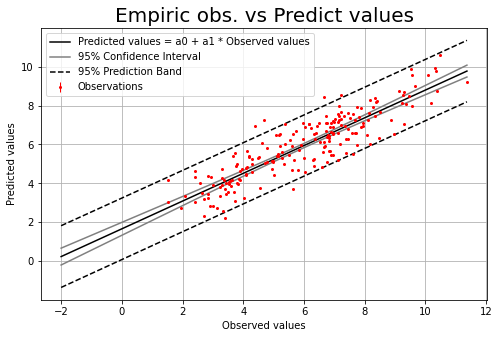

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 1.14, median - 1.141, CI - [1.111-1.182]

SHAP-values for: A_year: mean - 0.467, median - 0.457, CI - [0.428-0.504]

SHAP-values for: D_cm: mean - 0.231, median - 0.234, CI - [0.212-0.252]

SHAP-values for: F_Soil_ID: mean - 0.195, median - 0.199, CI - [0.149-0.232]

SHAP-values for: G_m2_ha: mean - 0.206, median - 0.209, CI - [0.181-0.226]

SHAP-values for: H_m: mean - 0.175, median - 0.176, CI - [0.146-0.206]

SHAP-values for: Species_ID: mean - 0.05, median - 0.047, CI - [0.036-0.058]



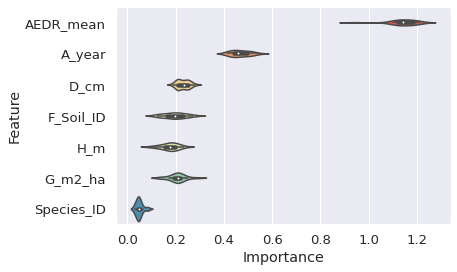

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'A_year', 'D_cm', 'F_Soil_ID', 'H_m', 'G_m2_ha', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 68.5, median: 68.0,
 pred. interval (P(0.025)-P(0.975)): 27.425-104.575, 
 conf. interval (p-value=0.95): 53.691-88.621 
***
Aggregate bias statistic: 
 mean: -0.043, median: -0.01,
 pred. interval (P(0.025)-P(0.975)): -0.296-0.18, 
 conf. interval (p-value=0.95): -0.194-0.057 
***
Aggregate RMSE statistic: 
 mean: 0.992, median: 1.004, pred. interval (P(0.025)-P(0.975)): 0.765-1.161, 
 conf. interval (p-value=0.95): 0.948-1.05 
***
Aggregate MSE statistic: 
 mean: 0.994, median: 1.007, pred. interval (P(0.025)-P(0.975)): 0.586-1.349, 
 conf. interval (p-value=0.95): 0.899-1.104 
***
Aggregate R^2 statistic: 
 mean: 0.757, median: 0.765, pred. interval (P(0.025)-P(0.975)): 0.595-0.85, 
 conf. interval (p-value=0.95): 0.686-0.824 
***
Aggregate bias(%) statistic: 
 mean: -0.688, median: -0.01, pred. interval (P(0.025)-P(0.975)): -4.979-3.175, 
 conf. interval (p-value=0.95): -3.231-0

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

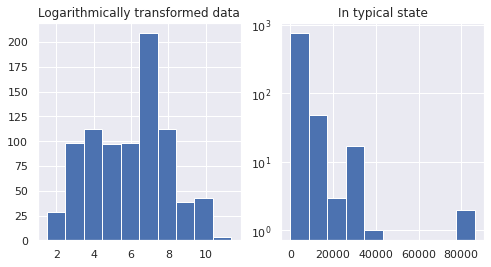

In [129]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [130]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 2, 4, 6, 8, 10])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 2000, 5000, 10000, 100000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

In [131]:
l = list(T_exp_grouped)[4][1]
l.describe()

,index,ln_A_Cs,Obs,index,0,T_exp_empiric,T_exp_pred,ln_residuals,T_exp_residuals,ln_residuals_%,T_exp_residuals_%
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,145.333333,9.752393,145.333333,21.727273,8.805309,20009.090909,9314.798828,0.947082,10694.290642,9.686238,49.394325
std,75.804066,0.505224,75.804066,11.481819,0.864588,14297.861349,7558.849121,0.777838,13841.378334,7.894986,36.245063
min,6.000000,9.220291,6.000000,2.000000,6.788852,10100.000000,887.893433,-0.501167,-9043.996094,-5.253523,-65.064720
25%,174.000000,9.316352,174.000000,12.250000,8.163013,11125.000000,3508.885437,0.394565,5268.021240,3.996489,32.549811
50%,179.000000,9.546813,179.000000,24.000000,8.733098,14000.000000,6207.035400,0.805482,8514.301392,8.411097,55.304297
75%,187.000000,10.177324,187.000000,30.000000,9.612747,26300.000000,14962.398682,1.479723,11819.417480,15.445348,77.222375
max,205.000000,11.366743,205.000000,40.000000,10.582056,86400.000000,39421.082031,3.026968,77816.719727,29.742277,95.153764


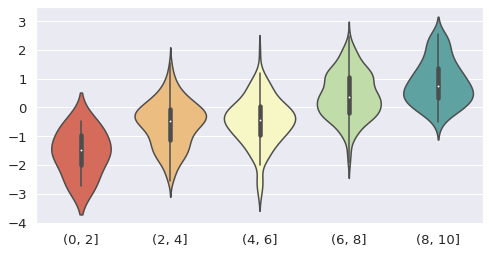

In [132]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

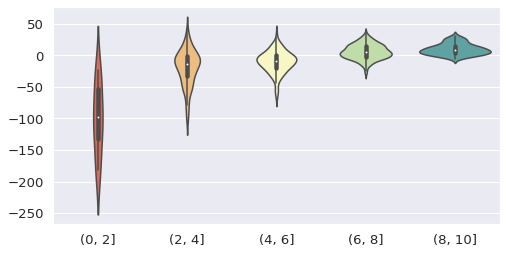

In [133]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

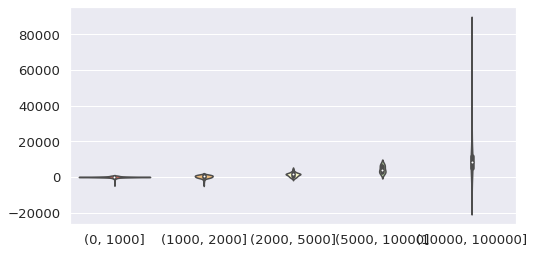

In [134]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

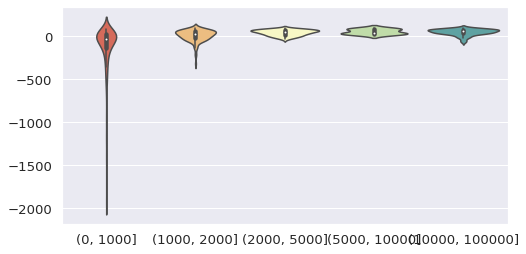

In [135]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [ ]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [ ]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [ ]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

In [ ]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

In [ ]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

In [ ]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [ ]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

In [ ]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

In [ ]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

In [ ]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

In [ ]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [ ]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

In [ ]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [ ]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

In [ ]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

In [ ]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.txt")